In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import os

In [2]:
faixas_tempo = [-5000, -1440, 0, 720, 1440, 2880, 4320, 5760, 7200]  # Exemplos de intervalos de tempo em horas
time_labels = ['<-24h', '-24-0h', '0-12h', '12-24h', '24-48h', '48-72h', '72-96h', '>96h']  # Rótulos para cada intervalo


In [ ]:
df_vars = pd.read_csv("TabelaVars.csv")

tables = df_vars['table'].unique()

for table in tables:
  df = pd.read_csv(table + ".csv")
  df_filtered = df_vars[df_vars['table'] == table]

  totalpatients = df['patientunitstayid'].nunique()

  for index, row in df_filtered.iterrows():
    var_procurada = row['var']
    column_time = row['col_time']
    column_var_name = row['col_var']

    df_filtrado = df[df[column_var_name].str.contains(var_procurada)].copy()
    df_time = df_filtrado[['patientunitstayid', column_time]].copy()

    numPatientSpec = df_filtrado['patientunitstayid'].nunique()

    counting = df_filtrado['patientunitstayid'].value_counts()

    cincMostFreq = counting.value_counts().sort_values(ascending=False).head(5)
    sum = cincMostFreq.sum()
    percentModal = round(((sum/numPatientSpec) * 100), 2)

    df_time = df_time.sort_values(by=['patientunitstayid', column_time])
    df_time['previous'] = df_time.groupby('patientunitstayid')[column_time].shift(1)
    df_time['timedif'] = df_time[row['col_time']] - df_time['previous']

    valid_dif = df_time['timedif'].dropna()
    timemean = valid_dif.mean()

    maiorfreq = cincMostFreq.iloc[0]

    df_vars.at[index, 'totalpatients'] = round(totalpatients, 2)
    df_vars.at[index, 'totalexampatients'] = round(numPatientSpec, 2)
    df_vars.at[index, '%exampatients'] = round(((numPatientSpec/totalpatients)*100), 2)
    df_vars.at[index, 'modal_colect'] = round(sum, 2)
    df_vars.at[index, 'percent_modal'] = round(percentModal, 2)
    df_vars.at[index, 'mean_time'] = round(timemean, 2)

    df_filtrado['faixas'] = pd.cut(df_filtrado[column_time], bins=faixas_tempo, labels=time_labels, right=False)

    contagem_faixas = df_filtrado['faixas'].value_counts().sort_index()
    cores = plt.cm.viridis(np.linspace(0, 1, len(contagem_faixas)))

    plt.figure(figsize=(10, 6))
    plt.bar(contagem_faixas.index, contagem_faixas.values, color= cores)

    for i, valor in enumerate(contagem_faixas):se
    plt.xticks(rotation=45, ha='right')

    plt.xlabel('Tempo')
    plt.ylabel('Número de Pacientes')
    plt.title(f'Distribuição de Pacientes por Faixas para {var_procurada}')

    file_path = os.path.join('graficos', f'distribuicao_pacientes_{var_procurada}.png')
    plt.savefig(file_path)
    
    plt.show()
    

df_vars.to_csv("TabelaVars.csv", index=False)



In [ ]:
df_diagnosis = pd.read_csv("diagnosis.csv")
column_time = 'diagnosisoffset'

counting = df_diagnosis['patientunitstayid'].value_counts()
cincMostFreq = counting.value_counts().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
cincMostFreq.plot(kind='bar', color='skyblue')
plt.title(var_procurada)
plt.xlabel('vezes coletadas')
plt.ylabel('numero de pacientes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(cincMostFreq.values):
    plt.text(i, val + 0.05 * val, f'{val}', ha='center', va='bottom')


In [ ]:
df_vars = pd.read_csv("TabelaVars.csv")

tables = df_vars['table'].unique()

for table in tables:
  df = pd.read_csv(table + ".csv")
  df_filtered = df_vars[df_vars['table'] == table]

  totalpatients = df['patientunitstayid'].nunique()

  for index, row in df_filtered.iterrows():
    var_procurada = row['var']
    column_time = row['col_time']
    column_var_name = row['col_var']

    df_filtrado = df[df[column_var_name].str.contains(var_procurada)].copy()

    counting = df_filtrado['patientunitstayid'].value_counts()

    cincMostFreq = counting.value_counts().sort_values(ascending=False).head(5)


    # Plotar o histograma
    plt.figure(figsize=(8, 6))
    cincMostFreq.plot(kind='bar', color='skyblue')
    plt.title(var_procurada)
    plt.xlabel('vezes coletadas')
    plt.ylabel('numero de pacientes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    maiorfreq = cincMostFreq.iloc[0]

    plt.text(3.6, maiorfreq - 0*(maiorfreq/20), f"a: {df_vars.at[index, 'totalpatients']}", fontsize=12, color='black')
    plt.text(3.6, maiorfreq - 1*(maiorfreq/20), f"b: {df_vars.at[index, 'totalexampatients']}", fontsize=12, color='black')
    plt.text(3.6, maiorfreq - 2*(maiorfreq/20), f"c: {df_vars.at[index, '%exampatients']}", fontsize=12, color='black')
    plt.text(3.6, maiorfreq - 3*(maiorfreq/20), f"d: {df_vars.at[index, 'modal_colect']}", fontsize=12, color='black')
    plt.text(3.6, maiorfreq - 4*(maiorfreq/20), f"e: {df_vars.at[index, 'percent_modal']}", fontsize=12, color='black')
    plt.text(3.6, maiorfreq - 5*(maiorfreq/20), f"f: {df_vars.at[index, 'mean_time']}", fontsize=12, color='black')

    file_path = os.path.join('graficos', f'frequencias_{var_procurada}.png')
    plt.savefig(file_path)

    plt.show()

    

ConversionError: Failed to convert value(s) to axis units: array(['fibrinogen', 'PT - INR', 'magnesium', ..., '-monos', 'WBC x 1000',
       'MCH'], dtype=object)

/home/phocus4/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/phocus4/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/phocus4/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/phocus4/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecati

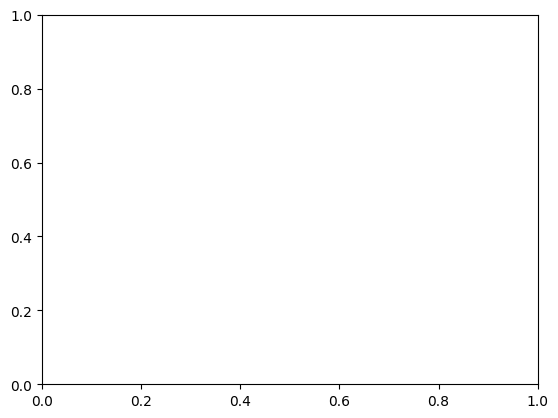

In [3]:
df_vars = pd.read_csv('TabelaVars.csv')
tables = df_vars['table'].unique()

start_time = -1440
end_time = 7200
interval = 360

for table in tables:
    df = pd.read_csv(table + ".csv")
    df_filtered = df_vars[df_vars['table'] == table]
    totalpatients = df['patientunitstayid'].nunique()

    for index, row in df_filtered.iterrows():
        var_procurada = row['var']
        column_time = row['col_time']
        column_var_name = row['col_var']

        df_filtrado = df[df[column_var_name].str.contains(var_procurada, na=False)].copy()

        bins = list(range(start_time, end_time + interval, interval))

        # Crie o histograma
        plt.figure()
        counts, _ = plt.hist(df_filtrado[column_time], edgecolor='k', bins=10)
        for i, freq in enumerate(counts):
            plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, freq + 1, str(int(freq)), fontsize=9, ha='center', va='bottom')
        plt.xlabel('contagem') 
        plt.ylabel('Frequência')
        plt.title(f'Histograma de {var_procurada}')

        # Salve o gráficodg_column = 'diagnosisstring'

        file_path = os.path.join('graficos', f'histograma_{var_procurada}.png')
        plt.savefig(file_path)

        plt.show()


In [3]:
patient_csv = "patient.csv"
apacheApsVar = "apacheApsVar.csv"
infusiondrug = "infusiondrug.csv"
physicalExam = "physicalExam.csv"
lab = "lab.csv"
hospital = "hospital.csv"
diagnosis = "diagnosis.csv"
respiratoryCare = "respiratoryCare.csv"

In [6]:
df = pd.read_csv(patient_csv)
df_diagnosis = pd.read_csv(diagnosis)

df_nosepsis = df[~df.apply(lambda row: any(row.astypequero salvar a(str).str.contains('Sepsis', case=False, na=False)), axis=1)].copy()

ids_nosepsis = df_nosepsis[['patientunitstayid', 'apacheadmissiondx']].copy()

diagnosis_nosepsis = pd.merge(ids_nosepsis, df_diagnosis, on='patientunitstayid', how='inner')

dev_sepsis = diagnosis_nosepsis[diagnosis_nosepsis.apply(lambda row: any(row.astype(str).str.contains('sepsis')), axis=1)].copy()

id_septicos = dev_sepsis.query('diagnosisoffset < 360').copy()
id_septicos = id_septicos['patientunitstayid'].copy().unique()

dev_sepsis = dev_sepsis[~dev_sepsis['patientunitstayid'].isin(id_septicos)].copy()
dev_sepsis_ids = dev_sepsis['patientunitstayid'].copy()

In [7]:
dgn_sepsis12h = pd.merge(dev_sepsis_ids, df_diagnosis, on='patientunitstayid', how='inner')
dgn_sepsis12h['patientunitstayid'].nunique()

2738